In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepath = '/content/drive/MyDrive/Digital Skola/Conqueror Project/segmentation data.csv'

In [4]:
customer_info = pd.read_csv(filepath)

In [6]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
customer_info.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [9]:
customer_info = customer_info.drop(columns = 'ID')

In [10]:
num_col = ['Age', 'Income']
cat_col = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']


In [11]:
customer_cp = customer_info.copy()

In [12]:
customer_cp[cat_col] = customer_cp[cat_col].astype('str')

In [13]:
customer_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              2000 non-null   object
 1   Marital status   2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Education        2000 non-null   object
 4   Income           2000 non-null   int64 
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


## Numerical Variables Distribution

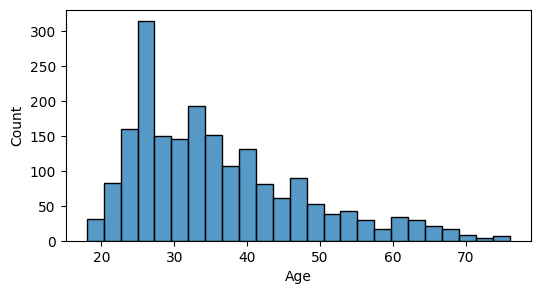

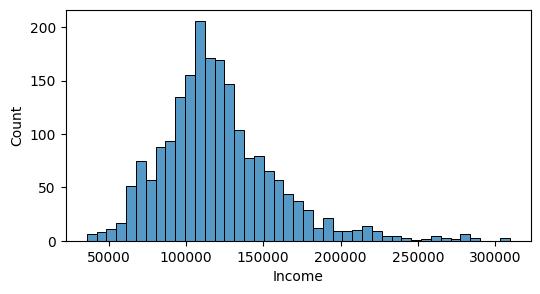

In [14]:
for num in num_col:
    plt.figure(figsize=(6,3))
    sns.histplot(data = customer_info, x = num)

## Categorical Variables Distribution

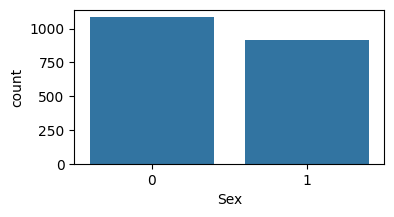

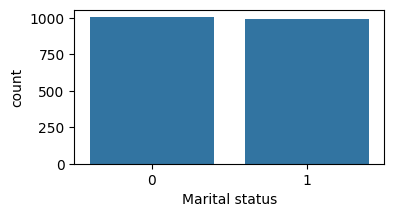

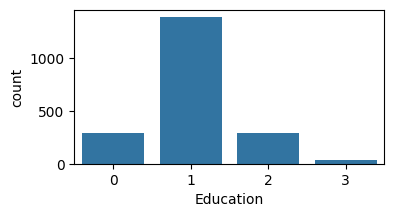

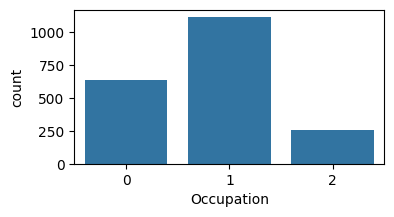

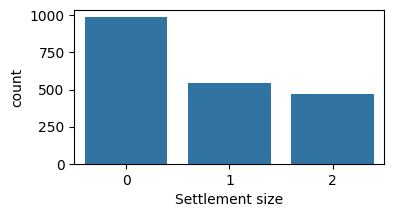

In [15]:
for cat in cat_col:
    plt.figure(figsize = (4, 2))
    sns.countplot(data = customer_info, x = cat)

## Bivariate Analysis

### Numerical Variables

<Axes: xlabel='Age', ylabel='Income'>

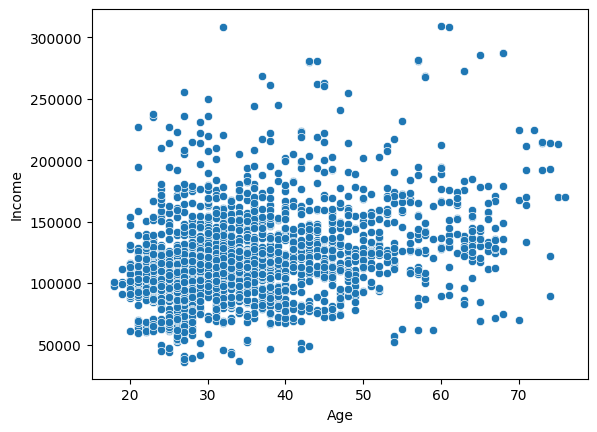

In [16]:
sns.scatterplot(x = 'Age', y = 'Income', data = customer_info)

In [17]:
import scipy.stats as stats

stats.pearsonr(customer_info['Age'], customer_info['Income'])

PearsonRResult(statistic=0.34061016373173514, pvalue=1.6443825442386822e-55)

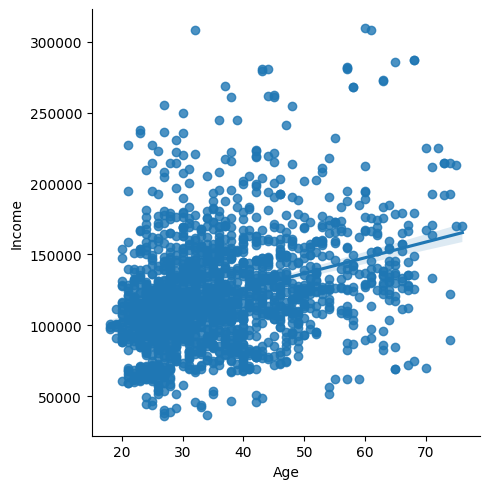

In [18]:
sns.lmplot(x = 'Age', y = 'Income', data = customer_info)

### Categorical vs Numerical

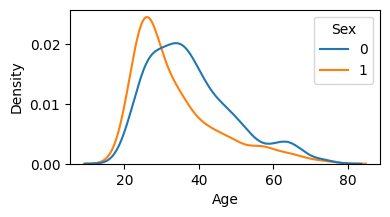

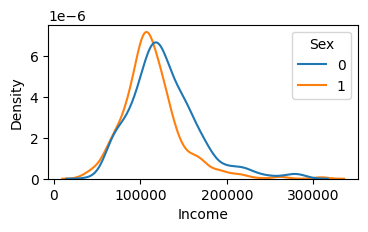

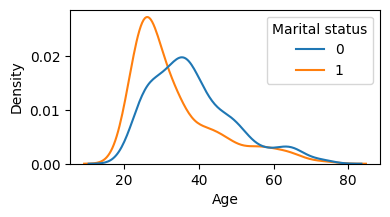

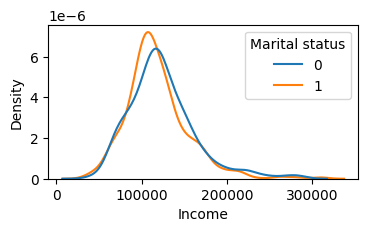

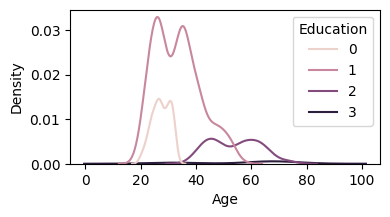

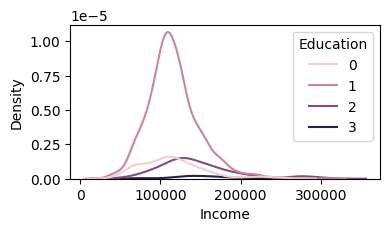

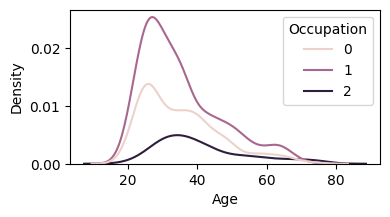

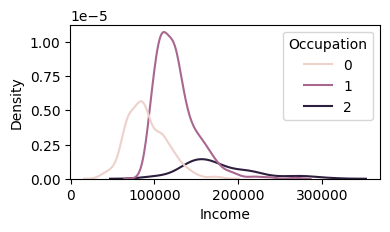

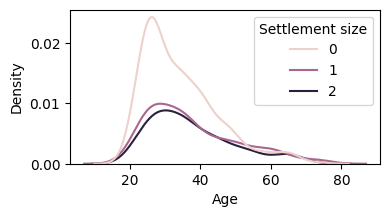

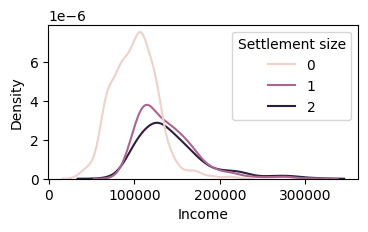

In [19]:
for cat in cat_col:
    for num in num_col:
      plt.figure(figsize = (4, 2))
      sns.kdeplot(data = customer_info, x = num, hue = cat)

### Categorical vs Categorical

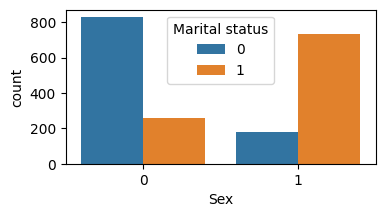

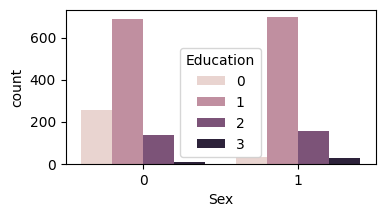

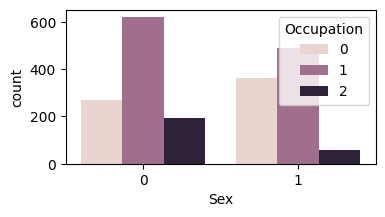

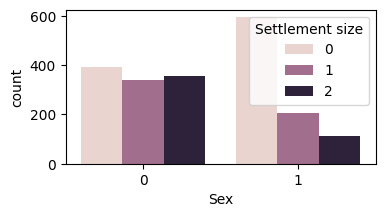

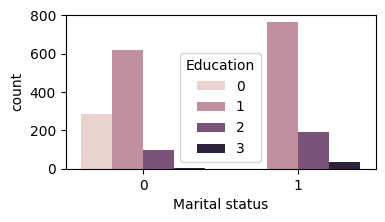

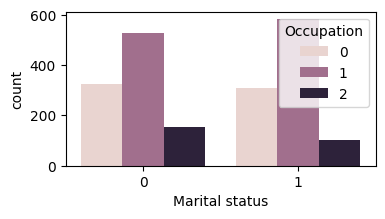

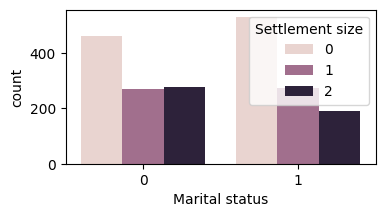

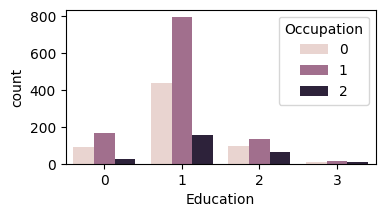

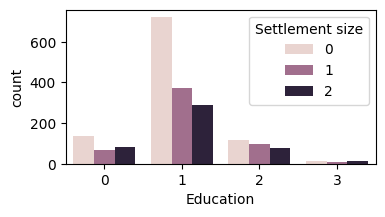

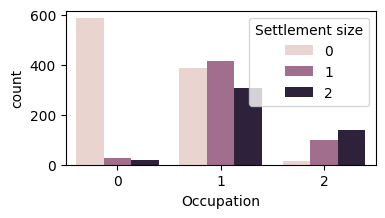

In [20]:
cat_aux = cat_col.copy()
for category1 in cat_col:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(4,2))
            sns.countplot(data=customer_info, x=category1, hue=category2)

## Multivariate Analysis

In [21]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

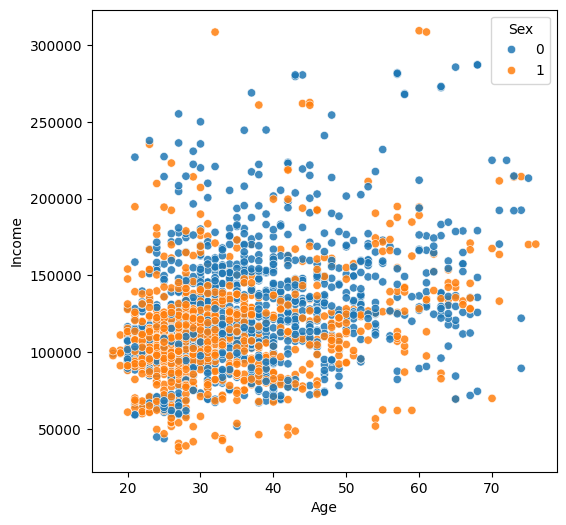

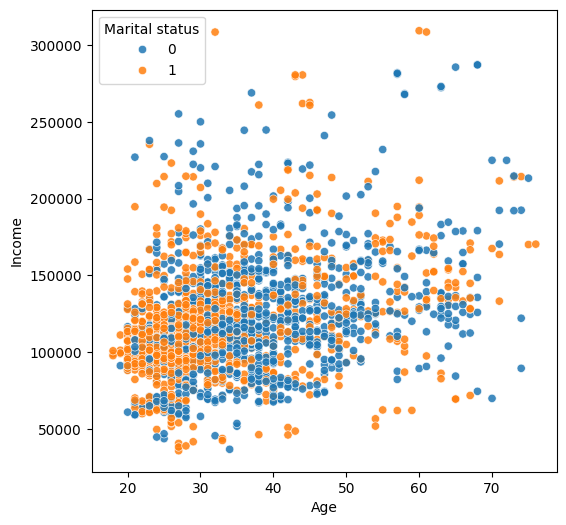

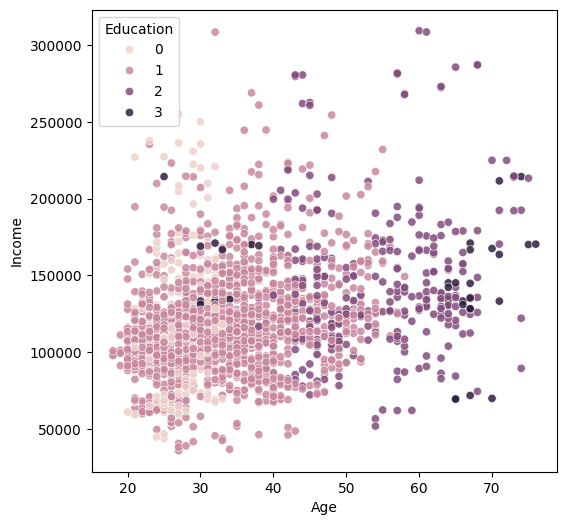

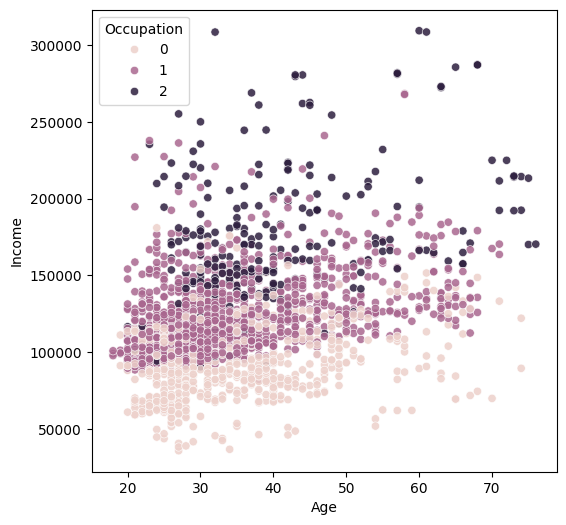

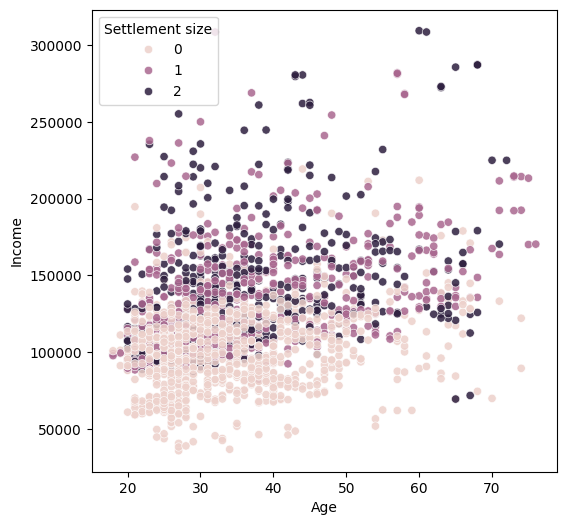

In [22]:
for cat in cat_col:
    bivariate_scatter('Age', 'Income', cat, customer_info)

## Feature Scaling

In [23]:
customer_info

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [24]:
customer_cp = customer_info.copy()

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(customer_cp)
X

array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

In [26]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,0.308776,0.346000,0.311197,0.405250,0.369500
std,0.498272,0.500113,0.202059,0.199927,0.139321,0.319294,0.406266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.155172,0.333333,0.226048,0.000000,0.000000
50%,0.000000,0.000000,0.258621,0.333333,0.291434,0.500000,0.500000
75%,1.000000,1.000000,0.413793,0.333333,0.373778,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5
...,...,...,...,...,...,...,...
1995,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0
1996,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0
1997,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0
1998,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0


## Clustering

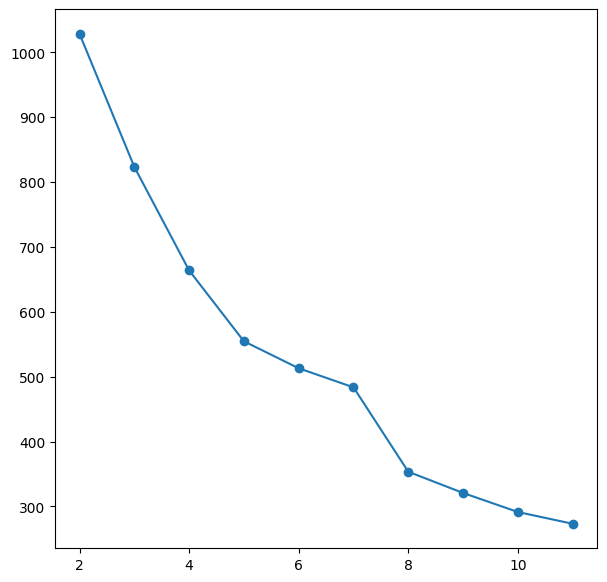

In [28]:
# elbow method
# menghitung inersia --> metrics/nilai yang mengukur seberapa padat suatu cluster dari hasil clustering

from sklearn.cluster import KMeans

clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
inertia = []

for c in clusters_range:
    kmeans = KMeans(n_clusters = c, random_state = 42).fit(X) # training clustering ke dalam c cluster dg Kmeans
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (7, 7))
plt.plot(clusters_range, inertia, marker = 'o')

## Sillhouette Score

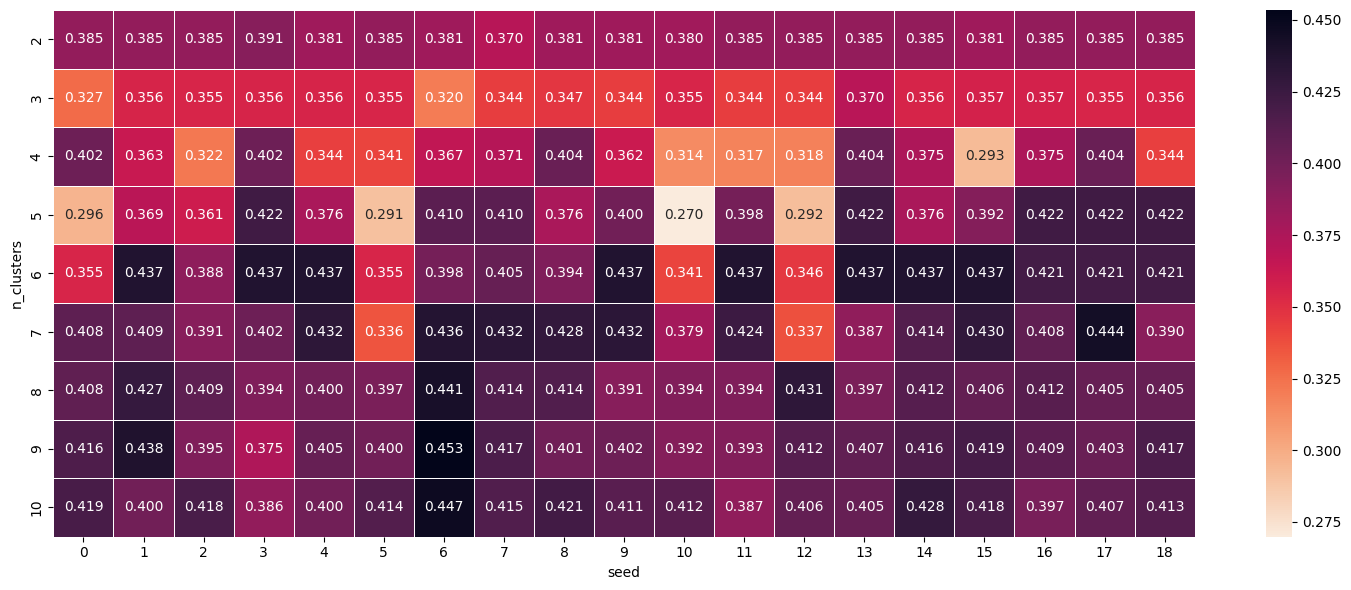

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 11)
random_range  =range(0, 19)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters = c, random_state = r)
        cluster_labels = clusterer.fit_predict(X)
        sillhouette_avg = silhouette_score(X, cluster_labels)
        results.append([c, r, sillhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

Berdasarkan hasil elbow method dan perhitungan sillhouette score di atas, serta pertimbangan bisnis, kita putuskan akan membagi data customer ke dalam 6 cluster.

## Re-running the clustering algorithm with 6 clusters

### Creating 3D data with PCA

PCA (Principal Component Analysis) adalah algoritma yang dapat mengurangi dimensi (dimensionality reduction). kita dapat memanfaatkan PCA untuk visualisasi data yang memiliki dimensi yang tinggi

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])
X_pca_df

,X1,X2,X3
0,-0.826086,0.354652,0.158422
1,0.524891,0.716293,0.240947
2,-0.486009,-0.690668,-0.181594
3,-0.707351,-0.028668,0.044773
4,-0.712574,-0.037939,0.046813
...,...,...,...
1995,0.195388,-0.680837,0.550240
1996,0.793264,-0.016224,0.007582
1997,-0.494899,-0.746080,-0.189808
1998,0.875828,-0.285273,-0.094256


In [31]:
# clustering untuk dataset kita menjadi 6 cluster

kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
labels = kmeans.labels_
X_pca_df['Labels'] = labels
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

X_pca_df

,X1,X2,X3,Labels
0,-0.826086,0.354652,0.158422,2
1,0.524891,0.716293,0.240947,4
2,-0.486009,-0.690668,-0.181594,3
3,-0.707351,-0.028668,0.044773,0
4,-0.712574,-0.037939,0.046813,0
...,...,...,...,...
1995,0.195388,-0.680837,0.550240,3
1996,0.793264,-0.016224,0.007582,1
1997,-0.494899,-0.746080,-0.189808,3
1998,0.875828,-0.285273,-0.094256,1


## Visualisasi Hasil Clustering

In [32]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [33]:
results_df = customer_info.copy()
results_df['Labels'] = kmeans.labels_
results_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,4
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3
1996,1,1,27,1,117744,1,0,1
1997,0,0,31,0,86400,0,0,3
1998,1,1,24,1,97968,0,0,1


In [34]:
results_df['Labels'].value_counts()

,count
Labels,
1,430
0,371
3,358
4,308
2,276
5,257


In [35]:
summary = {}

for index in range(5):
   # describe method provides general statistics about the data
   summary[index] = results_df[results_df['Labels'] == index].describe().T

In [36]:
# cluster 0
summary[0]

,count,mean,std,min,25%,50%,75%,max
Sex,371.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,371.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,371.0,39.568733,11.470408,20.0,31.0,37.0,47.0,75.0
Education,371.0,0.822102,0.597876,0.0,0.0,1.0,1.0,2.0
Income,371.0,136373.334232,34209.316029,82398.0,114452.0,126906.0,150123.5,281923.0
Occupation,371.0,1.102426,0.441459,0.0,1.0,1.0,1.0,2.0
Settlement size,371.0,0.695418,0.460852,0.0,0.0,1.0,1.0,1.0
Labels,371.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [37]:
# cluster 1
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Marital status,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,430.0,32.416279,10.911221,18.0,25.00,28.5,36.00,71.0
Education,430.0,1.211628,0.467453,1.0,1.00,1.0,1.00,3.0
Income,430.0,102142.332558,25801.373992,35832.0,86281.25,102323.5,120459.25,207262.0
Occupation,430.0,0.427907,0.495352,0.0,0.00,0.0,1.00,1.0
Settlement size,430.0,0.011628,0.107329,0.0,0.00,0.0,0.00,1.0
Labels,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [38]:
# cluster 2
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,276.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Marital status,276.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,276.0,39.753623,11.755578,20.0,31.00,37.0,46.00,72.0
Education,276.0,0.800725,0.609142,0.0,0.00,1.0,1.00,2.0
Income,276.0,146910.688406,38371.610025,87598.0,122905.25,137701.5,160826.25,287247.0
Occupation,276.0,1.304348,0.534057,0.0,1.00,1.0,2.00,2.0
Settlement size,276.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0
Labels,276.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0


In [39]:
# cluster 2
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,276.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Marital status,276.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,276.0,39.753623,11.755578,20.0,31.00,37.0,46.00,72.0
Education,276.0,0.800725,0.609142,0.0,0.00,1.0,1.00,2.0
Income,276.0,146910.688406,38371.610025,87598.0,122905.25,137701.5,160826.25,287247.0
Occupation,276.0,1.304348,0.534057,0.0,1.00,1.0,2.00,2.0
Settlement size,276.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0
Labels,276.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0


In [40]:
# cluster 3
summary[3]

,count,mean,std,min,25%,50%,75%,max
Sex,358.0,0.491620,0.500629,0.0,0.00,0.0,1.00,1.0
Marital status,358.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,358.0,36.164804,10.508004,19.0,27.00,35.0,42.00,74.0
Education,358.0,0.818436,0.587446,0.0,0.00,1.0,1.00,3.0
Income,358.0,92669.706704,21677.271954,36760.0,75645.75,89875.0,108618.75,171857.0
Occupation,358.0,0.173184,0.378936,0.0,0.00,0.0,0.00,1.0
Settlement size,358.0,0.030726,0.172817,0.0,0.00,0.0,0.00,1.0
Labels,358.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0


In [41]:
# cluster 4
summary[4]

,count,mean,std,min,25%,50%,75%,max
Sex,308.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,308.0,0.993506,0.080451,0.0,1.0,1.0,1.0,1.0
Age,308.0,34.253247,12.965784,18.0,25.0,29.0,40.0,76.0
Education,308.0,1.331169,0.571360,1.0,1.0,1.0,2.0,3.0
Income,308.0,136574.691558,37982.129269,88800.0,108497.0,127073.0,155077.0,309364.0
Occupation,308.0,1.188312,0.407894,0.0,1.0,1.0,1.0,2.0
Settlement size,308.0,1.350649,0.510891,0.0,1.0,1.0,2.0,2.0
Labels,308.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


In [43]:
results_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,4
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3
1996,1,1,27,1,117744,1,0,1
1997,0,0,31,0,86400,0,0,3
1998,1,1,24,1,97968,0,0,1


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [45]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters) # training untuk DecisionTres classifier

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       430
           2       1.00      1.00      1.00       276
           3       0.99      1.00      1.00       358
           4       1.00      0.99      0.99       308
           5       1.00      1.00      1.00       257

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [47]:
results_df.loc[0]

,0
Sex,0
Marital status,0
Age,67
Education,2
Income,124670
Occupation,1
Settlement size,2
Labels,2


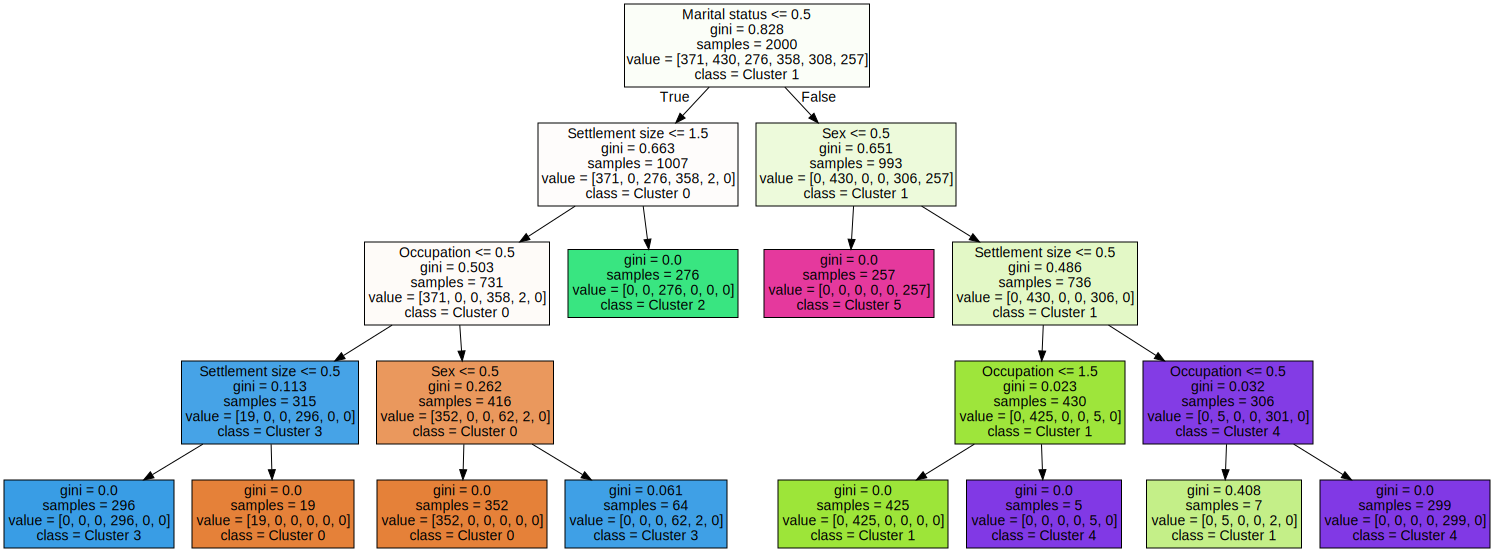

In [48]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=results_df.columns[:7],
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph